# **Arranging**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from numpy import savetxt, loadtxt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [110]:
url = 'https://raw.githubusercontent.com/RafaelYang/NTUNHS_Artificial-Intelligence/main/iris.csv'
data=pd.read_csv(url)
data=data.drop("variety",axis=1,inplace=False)

print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 150
欄位數量 4


轉折點目前發現5可以試試看作為K值


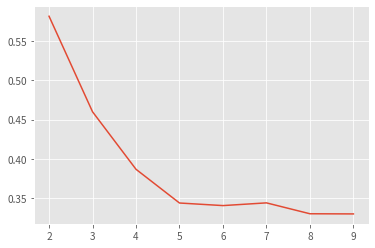

In [111]:
SS=StandardScaler()

full_scaled_data=SS.fit_transform(data)
scaled_data=SS.fit_transform(full_scaled_data)

#透過輪廓係數(-1,1) 該值越大表示分群效果越好
silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg)

print("轉折點目前發現{}可以試試看作為K值".format(5))

In [112]:
#選擇分群數量(K值為4)
n_clusters = 4

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(scaled_data);
print("kmean: k={}".format(n_clusters))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

kmean: k=4


In [113]:
#將分群結果寫入dataframe，有利於分群分析
data['group']=labels
#查看個群數量，由第0群開始排序
data['group'].value_counts().sort_index()

0    22
1    51
2    28
3    49
Name: group, dtype: int64

In [114]:
#質心
print(centers.shape)

#將質心存起來，下次Re-fresh的時候還可以用
savetxt('iris_centers.csv', centers, delimiter=',')

#讀取質心的檔案
load_centers = loadtxt('iris_centers.csv', delimiter=',')

#再次執行kmeans程式
kmean_test_centers = KMeans(n_clusters=n_clusters,init=load_centers)
kmean_test_centers.fit(scaled_data)
labels_test_centers = kmean_test_centers.labels_

#將分群結果寫入dataframe，有利於分群分析
data['group_test_centers']=labels_test_centers

(4, 4)


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [115]:
#欄位重新命名
data = data.rename(columns={'sepal.length': '睡眠時間(hr)',
                            'sepal.width':'飲酒數量(杯)',
                            'petal.length':'鹽分攝取(100克)',
                            'petal.width':'每日吸菸量(包)'})
#移除一欄
data = data.drop(columns={'group_test_centers'})


### **Painting**

In [116]:
#解決欄位標題無法使用中文字體之問題
#Colab進行matplotlib繪圖時顯示繁體中文
#下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-11-10 08:23:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.138, 142.251.163.100, 142.251.163.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/14v1d1e8nfmm7ctupr90k9hsvtmcpnp4/1668068625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d1d7fdff-ae69-4ac4-966b-4636f53f8b36 [following]
--2022-11-10 08:23:48--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/14v1d1e8nfmm7ctupr90k9hsvtmcpnp4/1668068625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d1d7fdff-ae69-4ac4-966b-4636f53f8b36
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to d

In [117]:
#取出四組不同的資料
group0 = data[data['group']==0]
group1 = data[data['group']==1]
group2 = data[data['group']==2]
group3 = data[data['group']==3]

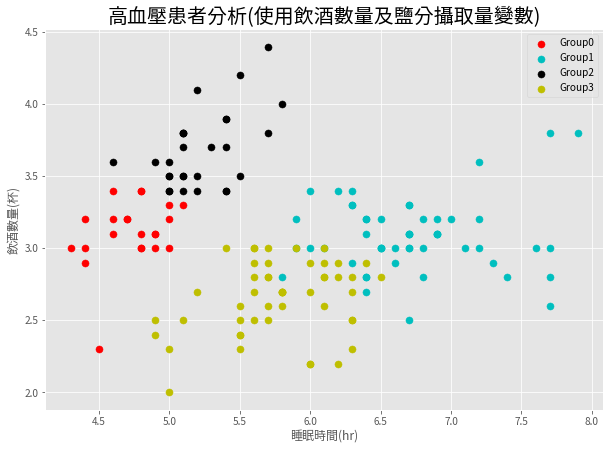

上述結果顯示四群民眾皆有不同的情況分布，接下來將對個別群體進行分析


In [118]:
#將各群的資料放置同一張散佈圖中
#設定圖大小
plt.figure(figsize=(10,7))   

#設定x座標標題及粗體
plt.xlabel("睡眠時間(hr)", fontweight = "bold")
#設定y座標標題及粗體
plt.ylabel("飲酒數量(杯)", fontweight = "bold")
#設定標題、字大小及粗體
plt.title("高血壓患者分析(使用飲酒數量及鹽分攝取量變數)",fontsize = 20, fontweight = "bold")

plt.scatter(group0['睡眠時間(hr)'], #x軸資料
            group0['飲酒數量(杯)'], #y軸資料
            s=200, label='Group0', #設定標籤
            c = 'R', marker='.')   #設定顏色
plt.scatter(group1['睡眠時間(hr)'], #x軸資料
            group1['飲酒數量(杯)'], #y軸資料
            s=200, label='Group1', #設定標籤
            c = 'C', marker='.')   #設定顏色
plt.scatter(group2['睡眠時間(hr)'], #x軸資料
            group2['飲酒數量(杯)'], #y軸資料
            s=200, label='Group2', #設定標籤
            c = 'K', marker='.')   #設定顏色
plt.scatter(group3['睡眠時間(hr)'], #x軸資料
            group3['飲酒數量(杯)'], #y軸資料
            s=200, label='Group3', #設定標籤
            c = 'Y', marker='.')   #設定顏色

#顯示圖例
plt.legend()
#顯示圖
plt.show() 

print("上述結果顯示四群民眾皆有不同的情況分布，接下來將對個別群體進行分析")

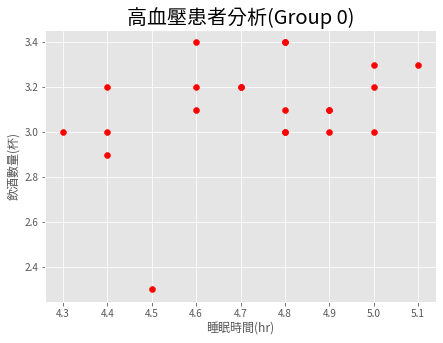

各統計資料:
此群共有22人
總睡眠時長:104.00小時,平均每人睡眠時間:4.73小時
總飲酒數量:68.40杯,平均每人飲酒數量:3.11杯

 解 讀 :由以上結果顯示，此群高血壓患者大部分每日會喝2.8~3.4杯酒，並且每天會睡6~7小時。不過大致上來看飲酒數量的多寡才是決定的關鍵
衛教建議:建議一定要先減少飲酒，再來如果每天可以睡到7hr以上，相信可以有所改善


In [119]:
#Group0
#設定圖大小
plt.figure(figsize=(7,5))

#使用ggplot主題樣式
plt.style.use("ggplot")     
#設定x座標標題及粗體
plt.xlabel("睡眠時間(hr)", fontweight = "bold")
#設定y座標標題及粗體
plt.ylabel("飲酒數量(杯)", fontweight = "bold")
#設定標題、字大小及粗體
plt.title("高血壓患者分析(Group 0)",fontsize = 20, fontweight = "bold")

#'睡眠時間(hr)','飲酒數量(杯)','鹽分攝取(100克)','每日吸菸量(包)'})
plt.scatter(group0['睡眠時間(hr)'],   #x軸資料
            group0['飲酒數量(杯)'],   #y軸資料
            c = "R")                #點的顏色
#顯示圖      
plt.show()
print('各統計資料:')
print('此群共有%d人'%len(group0['睡眠時間(hr)']))
print('總睡眠時長:%.2f小時,平均每人睡眠時間:%.2f小時' %(group0['睡眠時間(hr)'].sum(),group0['睡眠時間(hr)'].sum()/len(group0['睡眠時間(hr)'])))
print('總飲酒數量:%.2f杯,平均每人飲酒數量:%.2f杯' %(group0['飲酒數量(杯)'].sum(),group0['飲酒數量(杯)'].sum()/len(group0['飲酒數量(杯)'])))

print('\n 解 讀 :由以上結果顯示，此群高血壓患者大部分每日會喝2.8~3.4杯酒，並且每天會睡6~7小時。不過大致上來看飲酒數量的多寡才是決定的關鍵')
print('衛教建議:建議一定要先減少飲酒，再來如果每天可以睡到7hr以上，相信可以有所改善')

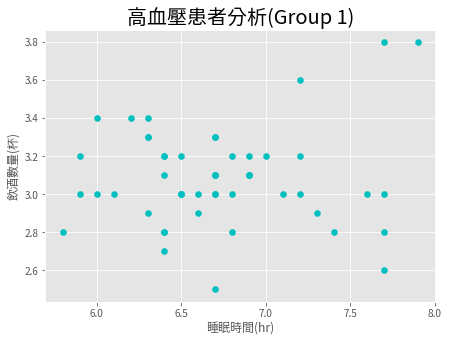

各統計資料:
此群共有51人
總睡眠時長:343.00小時,平均每人睡眠時間:6.73小時
總飲酒數量:157.20杯,平均每人飲酒數量:3.08杯

 解 讀 :由以上結果顯示，此群高血壓患者大部分每日都會喝三杯酒以上，並且睡眠時間普遍都偏低，差不多4.7hr而已
衛教建議:與上群相同，可以看到，在相同睡眠時間下，喝低於2.8杯酒的幾乎都沒有高血壓的患者，因此一定要先把喝酒數量拉低，相信可以有所改善


In [120]:
#Group1
#設定圖大小
plt.figure(figsize=(7,5))
#使用ggplot主題樣式
plt.style.use("ggplot")     
#設定x座標標題及粗體
plt.xlabel("睡眠時間(hr)", fontweight = "bold")
#設定y座標標題及粗體
plt.ylabel("飲酒數量(杯)", fontweight = "bold")
#設定標題、字大小及粗體
plt.title("高血壓患者分析(Group 1)",fontsize = 20, fontweight = "bold")

plt.scatter(group1['睡眠時間(hr)'],#x軸資料
            group1['飲酒數量(杯)'],#y軸資料
            c = "c")              #點的顏色
#顯示圖  
plt.show() 
print('各統計資料:')
print('此群共有%d人'%len(group1['睡眠時間(hr)']))
print('總睡眠時長:%.2f小時,平均每人睡眠時間:%.2f小時' %(group1['睡眠時間(hr)'].sum(),group1['睡眠時間(hr)'].sum()/len(group1['睡眠時間(hr)'])))
print('總飲酒數量:%.2f杯,平均每人飲酒數量:%.2f杯' %(group1['飲酒數量(杯)'].sum(),group1['飲酒數量(杯)'].sum()/len(group1['飲酒數量(杯)'])))

print('\n 解 讀 :由以上結果顯示，此群高血壓患者大部分每日都會喝三杯酒以上，並且睡眠時間普遍都偏低，差不多4.7hr而已')
print('衛教建議:與上群相同，可以看到，在相同睡眠時間下，喝低於2.8杯酒的幾乎都沒有高血壓的患者，因此一定要先把喝酒數量拉低，相信可以有所改善')

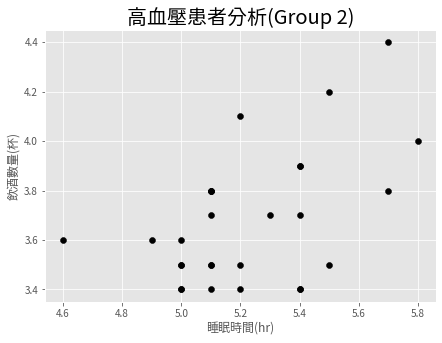

各統計資料:
此群共有28人
總睡眠時長:146.30小時,平均每人睡眠時間:5.23小時
總飲酒數量:103.00杯,平均每人飲酒數量:3.68杯

 解 讀 :由以上結果顯示，此群高血壓患者分布較平均，飲酒數量從2.2~3杯，睡眠時間從5.5~6.3小時
衛教建議:雖然此群分布較平均，不過還是可以看圖形右下角較少患者，因此建議此類人可以增加睡眠時間以及減少飲酒數量


In [121]:
#Group2
#設定圖大小
plt.figure(figsize=(7,5))
#使用ggplot主題樣式
plt.style.use("ggplot")     
#設定x座標標題及粗體
plt.xlabel("睡眠時間(hr)", fontweight = "bold")
#設定y座標標題及粗體
plt.ylabel("飲酒數量(杯)", fontweight = "bold")
#設定標題、字大小及粗體
plt.title("高血壓患者分析(Group 2)",fontsize = 20, fontweight = "bold")

plt.scatter(group2['睡眠時間(hr)'],#x軸資料
            group2['飲酒數量(杯)'],#y軸資料
            c = "K")              #點的顏色
#顯示圖  
plt.show()
print('各統計資料:')
print('此群共有%d人'%len(group2['睡眠時間(hr)']))
print('總睡眠時長:%.2f小時,平均每人睡眠時間:%.2f小時' %(group2['睡眠時間(hr)'].sum(),group2['睡眠時間(hr)'].sum()/len(group2['睡眠時間(hr)'])))
print('總飲酒數量:%.2f杯,平均每人飲酒數量:%.2f杯' %(group2['飲酒數量(杯)'].sum(),group2['飲酒數量(杯)'].sum()/len(group2['飲酒數量(杯)'])))

print('\n 解 讀 :由以上結果顯示，此群高血壓患者分布較平均，飲酒數量從2.2~3杯，睡眠時間從5.5~6.3小時')
print('衛教建議:雖然此群分布較平均，不過還是可以看圖形右下角較少患者，因此建議此類人可以增加睡眠時間以及減少飲酒數量')

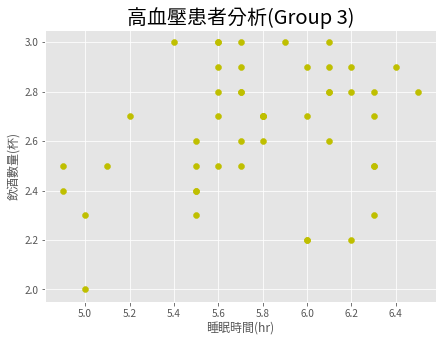

各統計資料:
此群共有49人
總睡眠時長:283.20小時,平均每人睡眠時間:5.78小時
總飲酒數量:130.00杯,平均每人飲酒數量:2.65杯

 解 讀 :由以上結果顯示，此群高血壓患者飲酒數量是四群之首，最高的甚至到每日4杯，睡眠時間則大多落在5小時左右
衛教建議:由於飲酒數量在此群都是偏高，因此一律建議降低。至於睡眠時間建議可以提高至5.8小時以上，或者是可以選擇降至4.6小時以下皆可


In [122]:
#Group3
#設定圖大小
plt.figure(figsize=(7,5))
#使用ggplot主題樣式
plt.style.use("ggplot")     
#設定x座標標題及粗體
plt.xlabel("睡眠時間(hr)", fontweight = "bold")
#設定y座標標題及粗體
plt.ylabel("飲酒數量(杯)", fontweight = "bold")
#設定標題、字大小及粗體
plt.title("高血壓患者分析(Group 3)",fontsize = 20, fontweight = "bold")

plt.scatter(group3['睡眠時間(hr)'],#x軸資料
            group3['飲酒數量(杯)'],#y軸資料
            c = "Y")              #點的顏色
#顯示圖  
plt.show() 
print('各統計資料:')
print('此群共有%d人'%len(group3['睡眠時間(hr)']))
print('總睡眠時長:%.2f小時,平均每人睡眠時間:%.2f小時' %(group3['睡眠時間(hr)'].sum(),group3['睡眠時間(hr)'].sum()/len(group3['睡眠時間(hr)'])))
print('總飲酒數量:%.2f杯,平均每人飲酒數量:%.2f杯' %(group3['飲酒數量(杯)'].sum(),group3['飲酒數量(杯)'].sum()/len(group3['飲酒數量(杯)'])))

print('\n 解 讀 :由以上結果顯示，此群高血壓患者飲酒數量是四群之首，最高的甚至到每日4杯，睡眠時間則大多落在5小時左右')
print('衛教建議:由於飲酒數量在此群都是偏高，因此一律建議降低。至於睡眠時間建議可以提高至5.8小時以上，或者是可以選擇降至4.6小時以下皆可')

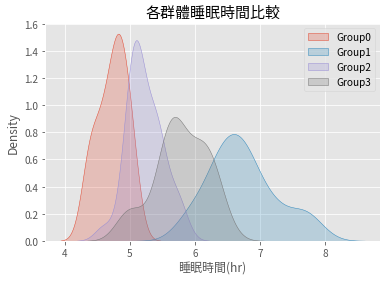

In [123]:
#視覺化報表
#各群體睡眠時間比較

plt.title("各群體睡眠時間比較",fontsize = 15, fontweight = "bold")
sns.kdeplot(group0['睡眠時間(hr)'], label='Group0',shade=True)
sns.kdeplot(group1['睡眠時間(hr)'], label='Group1',shade=True)
sns.kdeplot(group2['睡眠時間(hr)'], label='Group2',shade=True)
sns.kdeplot(group3['睡眠時間(hr)'], label='Group3',shade=True)

plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Group 3')

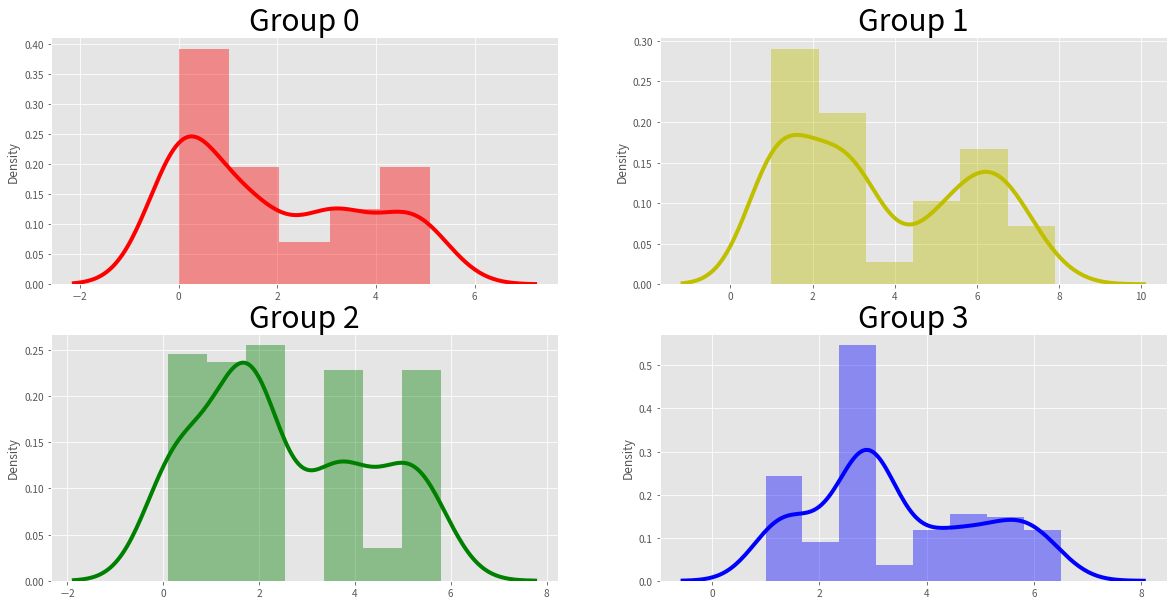

In [124]:
#一覽表視覺化
#數值型欄位
#每一張圖表大小為20x10
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)  #第一個位置
sns.distplot(group0, color="r",norm_hist=True,kde_kws={"lw":4})
plt.title("Group 0", {'fontsize':30})
plt.subplot(2, 2, 2)  #第二個位置
sns.distplot(group1, color="y",norm_hist=True,kde_kws={"lw":4})
plt.title("Group 1", {'fontsize':30})
plt.subplot(2, 2, 3)  #第三個位置
sns.distplot(group2, color="g",norm_hist=True,kde_kws={"lw":4})
plt.title("Group 2", {'fontsize':30})
plt.subplot(2, 2, 4)  #第四個位置
sns.distplot(group3, color="b",norm_hist=True,kde_kws={"lw":4})
plt.title("Group 3", {'fontsize':30})